In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [2]:
# Read in full dataset
df = pd.read_csv('./Resources/all_songs_final.csv')
df

,song,artist,year,peak-rank,weeks-on-board,track_id,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,billboard,decade
0,(1-2-3-4-5-6-7) Count The Days,Inez & Charlie Foxx,1968,76,5,4wXNtDvLZl55vlQashWQrI,0.686,0.562,5.0,-8.538,...,0.0504,0.58900,0.000053,0.1240,0.793,116.782,156886.0,4.0,1,1960s
1,(All Of A Sudden) My Heart Sings,Mel Carter,1965,38,7,6x5BiQwNlbtisITsEHa8Eu,0.419,0.546,7.0,-7.819,...,0.0363,0.47900,0.000005,0.5350,0.493,118.106,164067.0,3.0,1,1960s
2,(Baby) Hully Gully,The Olympics,1960,72,7,2CkbNJooPxUsHG4gFXKhxa,0.699,0.661,2.0,-6.090,...,0.0382,0.51600,0.000000,0.1980,0.869,115.772,218642.0,4.0,1,1960s
3,(Come round Here) Im The One You Need,The Miracles,1966,17,9,5YvokzRkNONpj5c0TIqTjQ,0.545,0.607,0.0,-9.525,...,0.0347,0.24200,0.000000,0.7790,0.767,113.880,150067.0,4.0,1,1960s
4,(Dance The) Mess Around,Chubby Checker,1961,24,7,58EirkLFB6O6wwRN9JowHB,0.511,0.694,10.0,-5.509,...,0.0479,0.38100,0.000000,0.1950,0.826,146.559,132933.0,4.0,1,1960s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225735,Gospel of Juke,FVLCRVM,2014,0,0,0EsMifwUmMfJZxzoMPXJKZ,0.264,0.966,5.0,-6.970,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213.0,4.0,0,2010s
1225736,Prism Visions,FVLCRVM,2014,0,0,2WSc2TB1CSJgGE0PEzVeiu,0.796,0.701,11.0,-6.602,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179.0,4.0,0,2010s
1225737,Tokyo 360,FVLCRVM,2014,0,0,6iProIgUe3ETpO6UT0v5Hg,0.785,0.796,9.0,-5.960,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335.0,4.0,0,2010s
1225738,Yummy!,FVLCRVM,2014,0,0,37B4SXC8uoBsUyKCWnhPfX,0.665,0.856,6.0,-6.788,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455.0,4.0,0,2010s


In [3]:
# mask = df[(df['billboard']==1) & ((df['weeks-on-board']<4) & (df['peak-rank']>50))]
df = df[(df['billboard']==0) | ((df['weeks-on-board']>1) & (df['peak-rank']<=10))]
# df.drop(mask.index, axis=1, inplace=True)
# len(df)

# # df[(df['billboard']==1) & (df['peak-rank']>=50) & (df['weeks-on-board']<4)]

df
# mask

,song,artist,year,peak-rank,weeks-on-board,track_id,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,billboard,decade
7,(Down At) Papa Joes,The Dixiebelles,1963,9,13,6GdqL01aKgClu3DS6qtlro,0.402,0.795,7.0,-10.709,...,0.0781,0.50100,0.000242,0.3490,0.737,165.551,152315.0,4.0,1,1960s
14,(I Cant Get No) Satisfaction,The Rolling Stones,1965,1,14,2PzU4IB8Dr6mxV3lHuaG34,0.723,0.863,2.0,-7.890,...,0.0338,0.03830,0.031700,0.1280,0.931,136.302,222813.0,4.0,1,1960s
18,(I Know) Im Losing You,The Temptations,1966,8,7,6y8o4V2R2dSt2ijgL8C72W,0.634,0.503,5.0,-11.890,...,0.0282,0.50000,0.000000,0.0465,0.813,109.570,149493.0,4.0,1,1960s
31,(Just Like) Romeo & Juliet,The Reflections,1964,6,12,1g5dBKKnqTB7vDTfZ6cCXr,0.772,0.857,3.0,-9.340,...,0.0356,0.21100,0.576000,0.2150,0.980,145.429,127933.0,4.0,1,1960s
34,(Maries The Name) His Latest Flame,Elvis Presley,1961,4,11,4qbLOU1T7xgTH87eUSkvJ1,0.661,0.917,4.0,-6.329,...,0.0375,0.56500,0.002020,0.1340,0.893,105.289,127093.0,4.0,1,1960s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225735,Gospel of Juke,FVLCRVM,2014,0,0,0EsMifwUmMfJZxzoMPXJKZ,0.264,0.966,5.0,-6.970,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213.0,4.0,0,2010s
1225736,Prism Visions,FVLCRVM,2014,0,0,2WSc2TB1CSJgGE0PEzVeiu,0.796,0.701,11.0,-6.602,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179.0,4.0,0,2010s
1225737,Tokyo 360,FVLCRVM,2014,0,0,6iProIgUe3ETpO6UT0v5Hg,0.785,0.796,9.0,-5.960,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335.0,4.0,0,2010s
1225738,Yummy!,FVLCRVM,2014,0,0,37B4SXC8uoBsUyKCWnhPfX,0.665,0.856,6.0,-6.788,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455.0,4.0,0,2010s


In [4]:
# Create separate dataframe for each decade
df1960s = df[df['decade']=='1960s']
df1970s = df[df['decade']=='1970s']
df1980s = df[df['decade']=='1980s']
df1990s = df[df['decade']=='1990s']
df2000s = df[df['decade']=='2000s']
df2010s = df[df['decade']=='2010s']


In [5]:
df = df1960s

In [6]:
df.groupby("billboard").median()

,year,peak-rank,weeks-on-board,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
billboard,,,,,,,,,,,,,,,,
0,1965.0,0.0,0.0,0.438,0.308,5.0,-13.833,1.0,0.0404,0.818,0.001710,0.145,0.436,108.943,184667.0,4.0
1,1964.0,5.0,13.0,0.556,0.522,5.0,-9.594,1.0,0.0365,0.548,0.000002,0.147,0.718,118.132,162160.0,4.0


In [7]:
# data = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#        'duration_ms', 'time_signature']]

data = df[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
7,0.402,0.795,-10.709,0.0781,0.5010,0.000242,0.3490,0.737,165.551,152315.0
14,0.723,0.863,-7.890,0.0338,0.0383,0.031700,0.1280,0.931,136.302,222813.0
18,0.634,0.503,-11.890,0.0282,0.5000,0.000000,0.0465,0.813,109.570,149493.0
31,0.772,0.857,-9.340,0.0356,0.2110,0.576000,0.2150,0.980,145.429,127933.0
34,0.661,0.917,-6.329,0.0375,0.5650,0.002020,0.1340,0.893,105.289,127093.0


In [8]:
target = df["billboard"]
target_names = ["hit", "not_a_hit"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
#removing the random_state dosent help
oversample = ADASYN(random_state=0)
X_res, y_res = oversample.fit_resample(X_train, y_train)

counter = Counter(y_res)
counter

y_res.value_counts()

1    6574
0    6448
Name: billboard, dtype: int64

In [11]:
X_train_scaled

array([[-2.21867743, -1.68382038, -4.29771268, ..., -2.00496104,
        -1.69091056, -1.27042395],
       [ 0.85943142,  0.8825496 ,  0.49843604, ...,  1.30100399,
         0.55900306, -0.47004282],
       [ 0.87428345,  0.92464006,  0.13624419, ...,  1.50889725,
         0.80765416, -0.02561851],
       ...,
       [ 0.53754981,  1.62272376,  1.10716165, ...,  1.48644687,
         1.41635975, -0.53449893],
       [-0.04238036,  2.03792386,  1.34989101, ...,  0.30780204,
         1.18807734, -0.40855091],
       [-0.92813614,  0.54380209,  0.32767197, ..., -0.04497195,
         1.94021309, -0.04328426]])

In [29]:
# Support vector machine linear classifier
from sklearn.svm import SVC 

modelsc = SVC(kernel='linear', probability=True)
modelsc.fit(X_res, y_res)

In [ ]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(modelsc, param_grid, verbose=3)
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


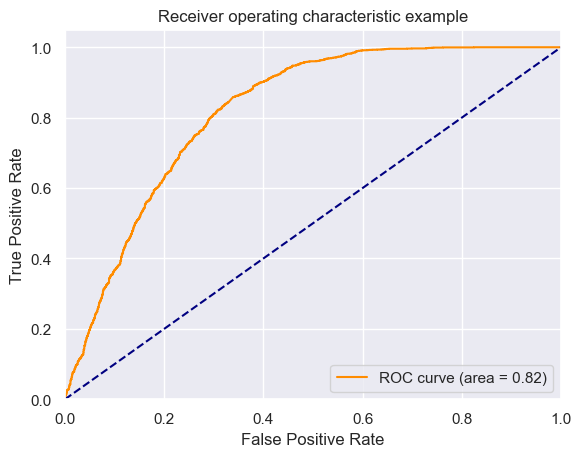

In [179]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

y_pred_proba = modelsc.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [22]:
# Model Accuracy
print('Scaled Test Acc: %.3f' % modelsc.score(X_test_scaled, y_test))
y_true = y_test
y_predsc = modelsc.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_predsc)
cm


Scaled Test Acc: 0.757


array([[1395,  762],
       [ 281, 1856]])

In [23]:
cm = confusion_matrix(y_test, y_predsc)

TN, FP, FN, TP = confusion_matrix(y_test, y_predsc).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  1856
False Positive(FP) =  762
True Negative(TN)  =  1395
False Negative(FN) =  281
Accuracy of the binary classification = 0.757


In [182]:
from sklearn.metrics import f1_score, classification_report

report = classification_report(y_test, y_predsc)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.62      0.72      2185
           1       0.69      0.88      0.78      2109

    accuracy                           0.75      4294
   macro avg       0.77      0.75      0.75      4294
weighted avg       0.77      0.75      0.75      4294



In [183]:
# modelsc = SVC(probability=True)
# modelsc.fit(X_train_scaled, y_train)
results = modelsc.predict_proba([[0.547,
 0.508,
#  5,
 -6.301,
#  0,
 0.0273,
 0.0151,
 0.00116,
 0.116,
 0.382,
 153.822,
 223667]])[0]

# gets a dictionary of {'class_name': probability}
prob_per_class_dictionary = dict(zip(modelsc.classes_, results))

# gets a list of ['most_probable_class', 'second_most_probable_class', ..., 'least_class']
results_ordered_by_probability = map(lambda x: x[0], sorted(zip(modelsc.classes_, results), key=lambda x: x[1], reverse=True))

In [184]:
list(results_ordered_by_probability)
prob_per_class_dictionary

{0: 0.9999998999999902, 1: 1.0000000994736041e-07}

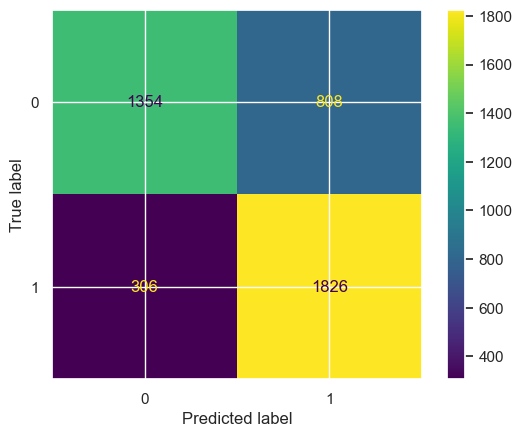

In [167]:
y_predsc = modelsc.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predsc)
cm


ConfusionMatrixDisplay(cm).plot()

In [168]:
test_song = [0.586,
 0.616,
 5,
 -7.964,
 1,
 0.0324,
 0.182,
 0,
 0.0927,
 0.719,
 148.088,
 242096]

modelsc.predict([test_song])

ValueError: X has 12 features, but SVC is expecting 10 features as input.

In [140]:
from sklearn.metrics import classification_report
predictions = modelsc.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         hit       0.80      0.76      0.78      2128
   not_a_hit       0.60      0.66      0.63      1168

    accuracy                           0.72      3296
   macro avg       0.70      0.71      0.70      3296
weighted avg       0.73      0.72      0.72      3296



In [124]:
results_df = pd.DataFrame({'actual': y_test, 'predictions': predictions})

In [125]:
results_df[results_df['actual']!=results_df['predictions']]

df[df['billboard']==1]
# results_df[results_df['predictions']==1]
df

,song,artist,year,peak-rank,weeks-on-board,track_id,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,billboard,decade
0,(1-2-3-4-5-6-7) Count The Days,Inez & Charlie Foxx,1968,76,5,4wXNtDvLZl55vlQashWQrI,0.686,0.562,5.0,-8.538,...,0.0504,0.589,0.000053,0.124,0.793,116.782,156886.0,4.0,1,1960s
1,(All Of A Sudden) My Heart Sings,Mel Carter,1965,38,7,6x5BiQwNlbtisITsEHa8Eu,0.419,0.546,7.0,-7.819,...,0.0363,0.479,0.000005,0.535,0.493,118.106,164067.0,3.0,1,1960s
2,(Baby) Hully Gully,The Olympics,1960,72,7,2CkbNJooPxUsHG4gFXKhxa,0.699,0.661,2.0,-6.090,...,0.0382,0.516,0.000000,0.198,0.869,115.772,218642.0,4.0,1,1960s
3,(Come round Here) Im The One You Need,The Miracles,1966,17,9,5YvokzRkNONpj5c0TIqTjQ,0.545,0.607,0.0,-9.525,...,0.0347,0.242,0.000000,0.779,0.767,113.880,150067.0,4.0,1,1960s
4,(Dance The) Mess Around,Chubby Checker,1961,24,7,58EirkLFB6O6wwRN9JowHB,0.511,0.694,10.0,-5.509,...,0.0479,0.381,0.000000,0.195,0.826,146.559,132933.0,4.0,1,1960s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224080,View the Holy City - Live,The Staple Singers,1965,0,0,7Llq7GQIwusvKBwelOxnMk,0.329,0.230,10.0,-16.434,...,0.0765,0.865,0.000003,0.830,0.542,179.174,217733.0,3.0,0,1960s
1224081,Tell Heaven - Live,The Staple Singers,1965,0,0,6AmsTTA0rfpye8KJdSMIhU,0.413,0.287,4.0,-16.937,...,0.3360,0.952,0.000001,0.397,0.380,131.361,369533.0,5.0,0,1960s
1224082,He's All Right - Live,The Staple Singers,1965,0,0,7qMZZkeHaWWewXcxE46zKD,0.662,0.846,11.0,-13.988,...,0.0891,0.719,0.167000,0.798,0.276,112.306,253493.0,4.0,0,1960s
1224083,Pops Outro - Live,The Staple Singers,1965,0,0,348s3JGWjKGZ2a26hmQcdp,0.569,0.275,2.0,-20.041,...,0.8960,0.962,0.000000,0.873,0.365,80.114,416187.0,4.0,0,1960s


In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [142]:
clf = RandomForestClassifier(random_state=1, n_estimators=200).fit(X_res, y_res)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.998381713360979
Testing Score: 0.7630461165048543


In [163]:
feature_importances = clf.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [162]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.735248447204969
Testing Score: 0.7382394038192828


In [89]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression())

In [131]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(data), target, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [132]:
len(X_selected_test_scaled)

7904

In [164]:
clf = LogisticRegression(class_weight={0:0.1, 1:0.9})
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

NameError: name 'X_selected_train_scaled' is not defined

In [87]:
test_song = [0.454,0.879,4.0,-5.44,1.0,0.0305,0.000861,0.00281,0.794,0.727,105.859,228467.0,4.0]

clf.predict([test_song])

NameError: name 'clf' is not defined

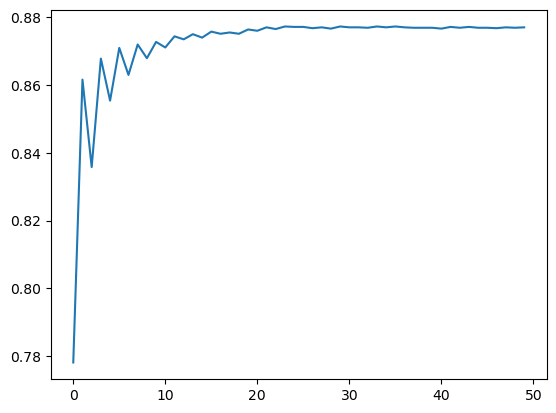

score: 0.8770242914979757


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [127]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8854118341697946
Testing Score: 0.8772773279352226


In [128]:
# BONUS
def model_tester(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = model.fit(X_train_scaled, y_train)
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    
model_tester(AdaBoostClassifier(random_state=1, n_estimators=100), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=500, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=2000, learning_rate=0.1), X, y)

              precision    recall  f1-score   support

         hit       0.88      1.00      0.93      6943
   not_a_hit       0.13      0.00      0.00       961

    accuracy                           0.88      7904
   macro avg       0.51      0.50      0.47      7904
weighted avg       0.79      0.88      0.82      7904

Training Score: 0.8841887731432668
Testing Score: 0.8741143724696356
              precision    recall  f1-score   support

         hit       0.88      1.00      0.93      6943
   not_a_hit       0.13      0.00      0.00       961

    accuracy                           0.88      7904
   macro avg       0.51      0.50      0.47      7904
weighted avg       0.79      0.88      0.82      7904

Training Score: 0.8861288009784488
Testing Score: 0.874746963562753
              precision    recall  f1-score   support

         hit       0.88      1.00      0.93      6943
   not_a_hit       0.13      0.00      0.00       961

    accuracy                           0.88  

In [28]:
X

NameError: name 'X' is not defined

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [20]:
model = Pipeline([
                  ('scaler',StandardScaler()),
                  ('model',MLPClassifier(random_state=0))
])

In [21]:
search = GridSearchCV(model,
                      {'model__hidden_layer_sizes':[(x,) for x in np.arange(5,100,2)]},
                      cv = 5, scoring = "roc_auc", verbose=3, n_jobs = -1
                      
                      )

In [22]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximu

[CV 5/5] END ....model__hidden_layer_sizes=(5,);, score=0.821 total time=   3.5s
[CV 2/5] END ....model__hidden_layer_sizes=(7,);, score=0.829 total time=   3.6s
[CV 1/5] END ....model__hidden_layer_sizes=(5,);, score=0.842 total time=   3.6s
[CV 3/5] END ....model__hidden_layer_sizes=(5,);, score=0.827 total time=   3.6s
[CV 2/5] END ....model__hidden_layer_sizes=(5,);, score=0.828 total time=   3.6s
[CV 3/5] END ....model__hidden_layer_sizes=(7,);, score=0.828 total time=   3.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ....model__hidden_layer_sizes=(5,);, score=0.838 total time=   3.7s
[CV 1/5] END ....model__hidden_layer_sizes=(7,);, score=0.842 total time=   3.8s
[CV 5/5] END ....model__hidden_layer_sizes=(7,);, score=0.826 total time=   2.8s
[CV 3/5] END ....model__hidden_layer_sizes=(9,);, score=0.829 total time=   2.9s
[CV 5/5] END ....model__hidden_layer_sizes=(9,);, score=0.832 total time=   2.9s
[CV 2/5] END ....model__hidden_layer_sizes=(9,);, score=0.834 total time=   3.2s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ....model__hidden_layer_sizes=(7,);, score=0.844 total time=   3.5s
[CV 1/5] END ....model__hidden_layer_sizes=(9,);, score=0.843 total time=   3.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ....model__hidden_layer_sizes=(9,);, score=0.844 total time=   3.6s
[CV 1/5] END ...model__hidden_layer_sizes=(11,);, score=0.842 total time=   3.7s
[CV 2/5] END ...model__hidden_layer_sizes=(11,);, score=0.832 total time=   3.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(11,);, score=0.838 total time=   3.6s
[CV 4/5] END ...model__hidden_layer_sizes=(11,);, score=0.845 total time=   3.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(11,);, score=0.834 total time=   3.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(13,);, score=0.831 total time=   3.8s
[CV 1/5] END ...model__hidden_layer_sizes=(13,);, score=0.845 total time=   3.8s
[CV 3/5] END ...model__hidden_layer_sizes=(13,);, score=0.833 total time=   3.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(13,);, score=0.844 total time=   3.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(13,);, score=0.829 total time=   3.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(15,);, score=0.844 total time=   3.4s
[CV 2/5] END ...model__hidden_layer_sizes=(15,);, score=0.837 total time=   3.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(15,);, score=0.834 total time=   3.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(15,);, score=0.834 total time=   3.3s
[CV 4/5] END ...model__hidden_layer_sizes=(15,);, score=0.844 total time=   3.4s
[CV 1/5] END ...model__hidden_layer_sizes=(17,);, score=0.849 total time=   3.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(17,);, score=0.838 total time=   3.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(17,);, score=0.841 total time=   3.5s
[CV 4/5] END ...model__hidden_layer_sizes=(17,);, score=0.847 total time=   3.4s
[CV 2/5] END ...model__hidden_layer_sizes=(19,);, score=0.838 total time=   3.2s
[CV 1/5] END ...model__hidden_layer_sizes=(19,);, score=0.850 total time=   3.5s
[CV 4/5] END ...model__hidden_layer_sizes=(19,);, score=0.843 total time=   3.0s
[CV 5/5] END ...model__hidden_layer_sizes=(17,);, score=0.834 total time=   3.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(19,);, score=0.841 total time=   3.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(19,);, score=0.836 total time=   3.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(21,);, score=0.846 total time=   3.8s
[CV 2/5] END ...model__hidden_layer_sizes=(21,);, score=0.840 total time=   3.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(21,);, score=0.840 total time=   3.6s
[CV 4/5] END ...model__hidden_layer_sizes=(21,);, score=0.849 total time=   3.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(21,);, score=0.839 total time=   3.8s
[CV 1/5] END ...model__hidden_layer_sizes=(23,);, score=0.847 total time=   3.8s
[CV 2/5] END ...model__hidden_layer_sizes=(23,);, score=0.835 total time=   3.7s
[CV 3/5] END ...model__hidden_layer_sizes=(23,);, score=0.842 total time=   3.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(23,);, score=0.837 total time=   3.8s
[CV 4/5] END ...model__hidden_layer_sizes=(23,);, score=0.850 total time=   4.0s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximu

[CV 3/5] END ...model__hidden_layer_sizes=(25,);, score=0.838 total time=   3.7s
[CV 1/5] END ...model__hidden_layer_sizes=(25,);, score=0.847 total time=   4.0s
[CV 2/5] END ...model__hidden_layer_sizes=(25,);, score=0.835 total time=   3.9s
[CV 5/5] END ...model__hidden_layer_sizes=(25,);, score=0.839 total time=   3.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(25,);, score=0.844 total time=   3.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(27,);, score=0.850 total time=   3.9s
[CV 5/5] END ...model__hidden_layer_sizes=(27,);, score=0.838 total time=   3.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(27,);, score=0.838 total time=   3.8s
[CV 3/5] END ...model__hidden_layer_sizes=(27,);, score=0.843 total time=   3.8s
[CV 4/5] END ...model__hidden_layer_sizes=(27,);, score=0.852 total time=   3.4s
[CV 1/5] END ...model__hidden_layer_sizes=(29,);, score=0.847 total time=   3.8s
[CV 2/5] END ...model__hidden_layer_sizes=(29,);, score=0.838 total time=   3.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(29,);, score=0.841 total time=   4.0s
[CV 4/5] END ...model__hidden_layer_sizes=(29,);, score=0.851 total time=   3.5s
[CV 5/5] END ...model__hidden_layer_sizes=(29,);, score=0.838 total time=   3.3s
[CV 4/5] END ...model__hidden_layer_sizes=(31,);, score=0.849 total time=   3.3s
[CV 1/5] END ...model__hidden_layer_sizes=(31,);, score=0.852 total time=   3.9s
[CV 3/5] END ...model__hidden_layer_sizes=(31,);, score=0.844 total time=   3.9s
[CV 2/5] END ...model__hidden_layer_sizes=(31,);, score=0.841 total time=   4.0s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximu

[CV 5/5] END ...model__hidden_layer_sizes=(31,);, score=0.836 total time=   3.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(33,);, score=0.846 total time=   3.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(33,);, score=0.838 total time=   3.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(33,);, score=0.844 total time=   4.0s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(33,);, score=0.841 total time=   4.0s
[CV 4/5] END ...model__hidden_layer_sizes=(33,);, score=0.851 total time=   4.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(35,);, score=0.839 total time=   4.1s
[CV 1/5] END ...model__hidden_layer_sizes=(35,);, score=0.853 total time=   4.2s
[CV 4/5] END ...model__hidden_layer_sizes=(35,);, score=0.851 total time=   3.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(35,);, score=0.842 total time=   4.3s
[CV 5/5] END ...model__hidden_layer_sizes=(35,);, score=0.839 total time=   4.0s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(37,);, score=0.850 total time=   4.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximu

[CV 5/5] END ...model__hidden_layer_sizes=(37,);, score=0.837 total time=   4.3s
[CV 2/5] END ...model__hidden_layer_sizes=(37,);, score=0.838 total time=   4.5s
[CV 4/5] END ...model__hidden_layer_sizes=(37,);, score=0.852 total time=   4.4s
[CV 3/5] END ...model__hidden_layer_sizes=(37,);, score=0.840 total time=   4.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(39,);, score=0.848 total time=   4.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(39,);, score=0.838 total time=   4.6s
[CV 3/5] END ...model__hidden_layer_sizes=(39,);, score=0.843 total time=   4.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(39,);, score=0.851 total time=   4.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximu

[CV 1/5] END ...model__hidden_layer_sizes=(41,);, score=0.846 total time=   4.4s
[CV 5/5] END ...model__hidden_layer_sizes=(39,);, score=0.838 total time=   4.4s
[CV 3/5] END ...model__hidden_layer_sizes=(41,);, score=0.844 total time=   4.3s
[CV 2/5] END ...model__hidden_layer_sizes=(41,);, score=0.837 total time=   4.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(41,);, score=0.849 total time=   4.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(41,);, score=0.836 total time=   4.5s
[CV 1/5] END ...model__hidden_layer_sizes=(43,);, score=0.847 total time=   4.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(43,);, score=0.840 total time=   4.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(43,);, score=0.853 total time=   4.4s
[CV 5/5] END ...model__hidden_layer_sizes=(43,);, score=0.839 total time=   4.3s
[CV 3/5] END ...model__hidden_layer_sizes=(43,);, score=0.844 total time=   4.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(45,);, score=0.848 total time=   4.5s
[CV 4/5] END ...model__hidden_layer_sizes=(45,);, score=0.852 total time=   4.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(45,);, score=0.839 total time=   4.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(45,);, score=0.845 total time=   4.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(45,);, score=0.839 total time=   4.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(47,);, score=0.839 total time=   4.6s
[CV 1/5] END ...model__hidden_layer_sizes=(47,);, score=0.849 total time=   4.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(47,);, score=0.846 total time=   4.8s
[CV 4/5] END ...model__hidden_layer_sizes=(47,);, score=0.850 total time=   4.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(47,);, score=0.839 total time=   4.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(49,);, score=0.846 total time=   5.0s
[CV 2/5] END ...model__hidden_layer_sizes=(49,);, score=0.836 total time=   4.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(49,);, score=0.845 total time=   5.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(49,);, score=0.852 total time=   5.2s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(51,);, score=0.851 total time=   5.3s
[CV 5/5] END ...model__hidden_layer_sizes=(49,);, score=0.838 total time=   5.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(51,);, score=0.838 total time=   5.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(51,);, score=0.843 total time=   4.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(51,);, score=0.849 total time=   5.0s
[CV 5/5] END ...model__hidden_layer_sizes=(51,);, score=0.836 total time=   5.0s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(53,);, score=0.849 total time=   5.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(53,);, score=0.839 total time=   5.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(53,);, score=0.843 total time=   5.5s
[CV 4/5] END ...model__hidden_layer_sizes=(53,);, score=0.855 total time=   5.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(53,);, score=0.839 total time=   5.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(55,);, score=0.850 total time=   5.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(55,);, score=0.839 total time=   5.7s
[CV 3/5] END ...model__hidden_layer_sizes=(55,);, score=0.845 total time=   5.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(55,);, score=0.855 total time=   5.0s
[CV 2/5] END ...model__hidden_layer_sizes=(57,);, score=0.839 total time=   4.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(55,);, score=0.839 total time=   5.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(57,);, score=0.850 total time=   5.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(57,);, score=0.845 total time=   5.2s
[CV 4/5] END ...model__hidden_layer_sizes=(57,);, score=0.852 total time=   4.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(57,);, score=0.839 total time=   5.3s
[CV 1/5] END ...model__hidden_layer_sizes=(59,);, score=0.850 total time=   5.2s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(59,);, score=0.838 total time=   5.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(59,);, score=0.845 total time=   5.1s
[CV 4/5] END ...model__hidden_layer_sizes=(59,);, score=0.852 total time=   5.0s
[CV 5/5] END ...model__hidden_layer_sizes=(59,);, score=0.841 total time=   5.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(61,);, score=0.849 total time=   5.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(61,);, score=0.837 total time=   5.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(61,);, score=0.854 total time=   5.3s
[CV 3/5] END ...model__hidden_layer_sizes=(61,);, score=0.843 total time=   5.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(61,);, score=0.843 total time=   5.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(63,);, score=0.850 total time=   6.3s
[CV 2/5] END ...model__hidden_layer_sizes=(63,);, score=0.840 total time=   6.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(63,);, score=0.846 total time=   6.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(63,);, score=0.843 total time=   6.1s
[CV 4/5] END ...model__hidden_layer_sizes=(63,);, score=0.850 total time=   6.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(65,);, score=0.850 total time=   6.2s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(65,);, score=0.838 total time=   6.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(65,);, score=0.844 total time=   6.2s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(65,);, score=0.851 total time=   5.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(65,);, score=0.838 total time=   6.0s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(67,);, score=0.852 total time=   6.0s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(67,);, score=0.843 total time=   6.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(67,);, score=0.842 total time=   6.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(67,);, score=0.852 total time=   6.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(67,);, score=0.840 total time=   6.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(69,);, score=0.850 total time=   6.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(69,);, score=0.840 total time=   6.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(69,);, score=0.844 total time=   6.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(69,);, score=0.851 total time=   6.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(69,);, score=0.841 total time=   6.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(71,);, score=0.852 total time=   7.1s
[CV 2/5] END ...model__hidden_layer_sizes=(71,);, score=0.840 total time=   6.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(71,);, score=0.842 total time=   6.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(71,);, score=0.854 total time=   6.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(71,);, score=0.837 total time=   6.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(73,);, score=0.849 total time=   6.0s
[CV 2/5] END ...model__hidden_layer_sizes=(73,);, score=0.835 total time=   5.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(73,);, score=0.847 total time=   5.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(73,);, score=0.855 total time=   5.9s
[CV 5/5] END ...model__hidden_layer_sizes=(73,);, score=0.836 total time=   5.8s
[CV 1/5] END ...model__hidden_layer_sizes=(75,);, score=0.849 total time=   5.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(75,);, score=0.836 total time=   5.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(75,);, score=0.842 total time=   5.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(75,);, score=0.854 total time=   5.5s
[CV 5/5] END ...model__hidden_layer_sizes=(75,);, score=0.840 total time=   5.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(77,);, score=0.850 total time=   5.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(77,);, score=0.852 total time=   5.6s
[CV 2/5] END ...model__hidden_layer_sizes=(77,);, score=0.839 total time=   5.8s
[CV 3/5] END ...model__hidden_layer_sizes=(77,);, score=0.846 total time=   5.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(77,);, score=0.839 total time=   5.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(79,);, score=0.850 total time=   5.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(79,);, score=0.845 total time=   5.7s
[CV 2/5] END ...model__hidden_layer_sizes=(79,);, score=0.842 total time=   5.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(79,);, score=0.856 total time=   5.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(79,);, score=0.840 total time=   6.0s
[CV 1/5] END ...model__hidden_layer_sizes=(81,);, score=0.851 total time=   6.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(81,);, score=0.835 total time=   6.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(81,);, score=0.844 total time=   5.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(81,);, score=0.851 total time=   5.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(81,);, score=0.840 total time=   5.9s
[CV 1/5] END ...model__hidden_layer_sizes=(83,);, score=0.849 total time=   6.0s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(83,);, score=0.840 total time=   6.2s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(83,);, score=0.844 total time=   6.2s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(83,);, score=0.855 total time=   6.5s
[CV 5/5] END ...model__hidden_layer_sizes=(83,);, score=0.840 total time=   6.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(85,);, score=0.851 total time=   6.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(85,);, score=0.838 total time=   6.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(85,);, score=0.842 total time=   7.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(85,);, score=0.852 total time=   7.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(85,);, score=0.841 total time=   7.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(87,);, score=0.852 total time=   7.2s
[CV 3/5] END ...model__hidden_layer_sizes=(87,);, score=0.847 total time=   7.0s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(87,);, score=0.841 total time=   7.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(87,);, score=0.852 total time=   6.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(87,);, score=0.837 total time=   6.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(89,);, score=0.848 total time=   6.5s
[CV 2/5] END ...model__hidden_layer_sizes=(89,);, score=0.837 total time=   6.3s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(89,);, score=0.849 total time=   6.2s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(89,);, score=0.854 total time=   6.2s
[CV 5/5] END ...model__hidden_layer_sizes=(89,);, score=0.839 total time=   6.2s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(91,);, score=0.850 total time=   6.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(91,);, score=0.841 total time=   6.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(91,);, score=0.847 total time=   6.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(91,);, score=0.853 total time=   6.4s
[CV 5/5] END ...model__hidden_layer_sizes=(91,);, score=0.835 total time=   6.4s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(93,);, score=0.849 total time=   6.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(93,);, score=0.839 total time=   6.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(93,);, score=0.845 total time=   6.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(93,);, score=0.852 total time=   6.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(93,);, score=0.839 total time=   6.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(95,);, score=0.851 total time=   6.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(95,);, score=0.840 total time=   6.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(95,);, score=0.847 total time=   6.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(95,);, score=0.854 total time=   6.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(95,);, score=0.839 total time=   6.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(97,);, score=0.849 total time=   6.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(97,);, score=0.843 total time=   6.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(97,);, score=0.846 total time=   6.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(97,);, score=0.854 total time=   6.9s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(97,);, score=0.838 total time=   6.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/5] END ...model__hidden_layer_sizes=(99,);, score=0.849 total time=   7.1s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/5] END ...model__hidden_layer_sizes=(99,);, score=0.841 total time=   6.8s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/5] END ...model__hidden_layer_sizes=(99,);, score=0.845 total time=   6.6s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 4/5] END ...model__hidden_layer_sizes=(99,);, score=0.855 total time=   6.7s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 5/5] END ...model__hidden_layer_sizes=(99,);, score=0.842 total time=   6.5s


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        MLPClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__hidden_layer_sizes': [(5,), (7,), (9,), (11,),
                                                       (13,), (15,), (17,),
                                                       (19,), (21,), (23,),
                                                       (25,), (27,), (29,),
                                                       (31,), (33,), (35,),
                                                       (37,), (39,), (41,),
                                                       (43,), (45,), (47,),
                                                       (49,), (51,), (53,),
                                                       (55,), (57,), (59,),
                                                       (61,), (63,), ...]},
 

In [23]:
search.best_score_

0.8464127889278362

In [24]:
search.best_params_

{'model__hidden_layer_sizes': (79,)}

In [27]:
roc_auc_score(y_test,search.predict_proba(X_test)[:,1])

0.8576772948402649

k: 1, Train/Test Score: 1.000/0.722
k: 6, Train/Test Score: 0.819/0.740
k: 11, Train/Test Score: 0.788/0.752
k: 16, Train/Test Score: 0.782/0.760
k: 21, Train/Test Score: 0.771/0.757
k: 26, Train/Test Score: 0.770/0.760
k: 31, Train/Test Score: 0.765/0.759
k: 36, Train/Test Score: 0.764/0.761
k: 41, Train/Test Score: 0.760/0.761
k: 46, Train/Test Score: 0.761/0.760
k: 51, Train/Test Score: 0.757/0.759
k: 56, Train/Test Score: 0.759/0.761
k: 61, Train/Test Score: 0.756/0.760
k: 66, Train/Test Score: 0.756/0.760
k: 71, Train/Test Score: 0.755/0.760
k: 76, Train/Test Score: 0.754/0.761
k: 81, Train/Test Score: 0.753/0.758
k: 86, Train/Test Score: 0.753/0.758
k: 91, Train/Test Score: 0.751/0.758
k: 96, Train/Test Score: 0.751/0.756


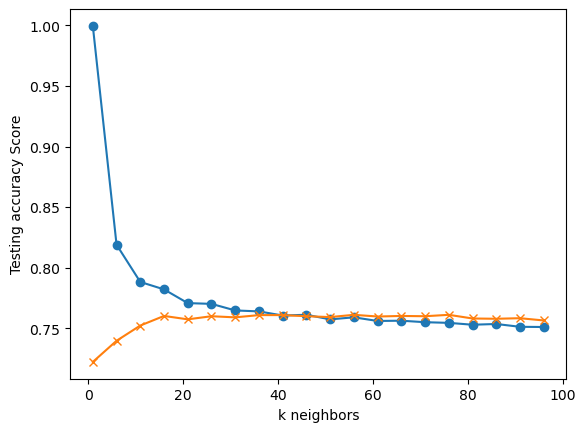

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 100, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 5), train_scores, marker='o')
plt.plot(range(1, 100, 5), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [56]:
y_predsc = knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predsc)

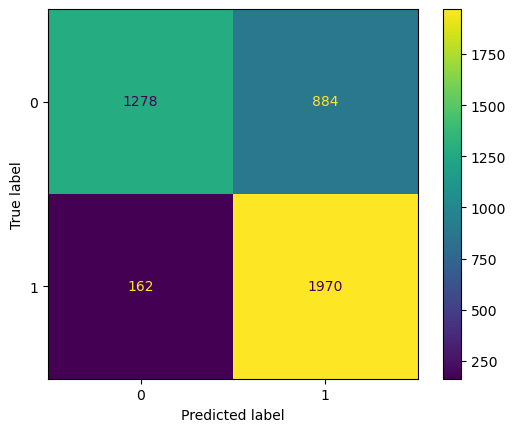

In [58]:
ConfusionMatrixDisplay(cm).plot()

In [59]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train_scaled, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  f"X has feature n

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

NameError: name 'hist' is not defined

In [ ]:
corr_matrix = corr_matrix = df.corr()
print(corr_matrix).corr()
print(corr_matrix)